#<a name='6'></a>
<div dir='rtl'>
<h1>6.  شبیه سازی   </h1>
</div>

<div dir='rtl'>
<b>
مسئله‌ی آسانسور:
</b>
 مرکز معتبر موسیقی امیرانه روزانه پذیرای اجرای هنرمندان بلند آوازه می‌باشد. سالن‌ اجرای این مرکز هنری گنجایش حضور 50 نفر از علاقه‌مندان را دارا می‌باشد. جهت رفاه حال علاقه‌مندان، مدیر این مجموعه به دنبال تعبیه و نصب آسانسور در این مرکز می‌باشد. بدین منظور تیم مدیریتی به شرکت معتبر آسانسور گلستانه مراجعه می‌کنند. متخصصین گلستانه ضمن استقبال از طرح نصب آسانسور به مدیر مرکز هنری گوشزد می‌نمایند که جهت عملکرد مناسب و طولانی مدت، آسانسور باید در 80 درصد موارد استفاده حداکثر با 50 درصد ظرفیت قابل حمل کار کند. بنابراین ابتدا مرکز امیرانه باید با بررسی آماری این ظرفیت را تعیین کرده و سپس اقدام به تهیه و نصب آسانسور نماید.
</div>

<div dir='rtl'>
 مدیر مسئول امیرانه با شما به عنوان متخصص آمار و احتمال تماس گرفته و از شما جهت حل مسئله درخواست کمک می‌نماید. شما با بررسی کامل مسئله متوجه حقایق زیر می‌شوید:
<br/>
1. تمام شرکت کنندگان به صورت همزمان در مرکز حضور دارند و تنها یک بار از آسانسور استفاده می‌گردد.
<br/>
2.   همانطور که در توضیحات ابتدایی مطرح شد مرکز امیرانه تنها گنجایش 50 نفر را در هر روز دارد و این تعداد همواره ثابت است.
<br/>
3.   وزن شرکت کنندگان مرکز امیرانه را می‌توان یک متغیر تصادفی در نظر گرفت که از یک توزیع یکنواخت گسسته در بازه‌ی 50-100 کیلوگرم پیروی می‌کند
(دقت نمایید توزیع گسسته است).
همچنین وزن هر شخص با استفاده از متغیر تصادفی 
$X$
نشان داده می‌شود.
<br/>
4. استفاده فرد 
$i$
ام
از آسانسور از یک توزیع برنولی پیروی می‌نماید که پارامتر این توزیع برنولی برای هر شخص برابر با $p_i$ است:
$$ Y_i \sim Ber(p_i); \,\, i \in \{1,2,...,50\}$$
که در رابطه‌ی بالا 
$Y_i \in \{0,1\}$
نشان دهنده‌ی استفاده یا عدم استفاده از شخص 
$i$
ام از آسانسور می‌باشد.
<br/>
5. همانطور که اشاره شد پارامتر احتمال توزیع برنولی برای هر شخص به صورت منحصر به فرد تعیین می‌گردد. در واقع افراد با وزن بیشتر علاقه بیشتری به استفاده از آسانسور دارند. شما پس از بررسی‌های دقیق متوجه می‌شوید که رابطه‌ی زیر صادق است:
$$ P_i = 1 - e^{(-a X_i)}; \,\, a = 0.003, i \in \{1, 2,...,50\}$$
که در رابطه‌ی بالا 
$a$
یک پارامتر تعیین شده است و 
$X_i$
وزن شخص 
$i$
ام است.
<br/>
6. در نهایت مجموع وزن افراد حاضر در آسانسور نیز یک متغیر تصادفی است که با استفاده از 
$W$ نمایش می‌دهیم.
</div>

<div dir='rtl'>
حال بر اساس مدلسازی صورت گرفته از مسئله ابتدا سعی خواهیم کرد که با استفاده از شبیه سازی تابع توزیع تجمعی را پیدا کرده و سپس بر اساس آن تحلیل‌های مرتبط را انجام دهیم.
</div>

<div dir='rtl'>
ابتدا تابعی می‌نویسیم تا احتمال استفاده هر فرد از آسانسور را مطابق بند 3 
و
4
تعیین نماید.
</div>

In [1]:
install.packages("pracma")
library(purrr)
library(pracma)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pracma’


The following object is masked from ‘package:purrr’:

    cross




In [2]:
# Inputs:
#    peoples_weight: A vector of people's weight, which the ith element of 
#                    the vector determines the ith person's weight.
# Outputs:
#    A binary vector of zeros and ones with the number of people as its length 
#    The ith element determines whether or not the ith person will use the elevator.
#    If 1: The corresponding person will use the elevator.
#    If 0: The corresponding person will not use the elevator.

stairs_or_elevator = function(peoples_weight) 
{
  return(sapply(peoples_weight,
  function(weight) {
    p = 1 - exp(-0.003*weight)
    if (rbernoulli(1,p)) {
      return(1);
    }
    return(0);
  }
  )
  )
}

<div dir='rtl'>
حالا یک بار رفت‌و‌آمد آسانسور را شبیه‌سازی کرده و مجموع وزن افراد حاضر در آسانسور را مشخص می‌نماییم.
</div>

In [3]:
# Inputs:
#    people_number: the number of people that are attending the concert. 

# Outputs:
#    The total weight of the people in the elevator.

  elevator = function(people_number=50) 
  {
  
  # As mentioned before, a person's weight is a random variable with 
  # a discrete uniform distribution.
  # In R, we do not have the discrete uniform distribution. 
  # However, we can use rdunif to generate integer samples from [50, 100].
  weights = rdunif(people_number, b=100, a=50)
  
  # Now apply the stairs_or_elevator function on the weights vector to obtain Y.
  Y = stairs_or_elevator(weights)

  indices = which(Y == 1)
  res = c();
  sapply(indices, function(a){
    res <<- c(res, c(weights[a]))
  })
  w = sum(res)
  return(w)
}

<div dir='rtl'>
فراموش نکن! مجموع وزن افراد حاضر در آسانسور خودش یک متغیر تصادفیه! برای بدست آوردن توزیعش اول از همه باید 
$n$
بار  مسئله رو اجرا کنیم. مثلا 
$n$
رو 
$1000$
فرض کن.
</div>

In [4]:
elevator_n = function(n, people_number) 
{
  return(vapply(rep(people_number, n), elevator, numeric(1)))
}

In [5]:
n_run = 1000

#Simulate for n_run times
total_weights = elevator_n(n=n_run, people_number=50)

<div dir='rtl'>
خوب تا به حال کارهای شبیه سازی مسئله انجام شده. اما باید به بررسی و تحلیل مسئلمون بپردازیم. اول از همه دیتامون رسم می‌کنیم.
</div>

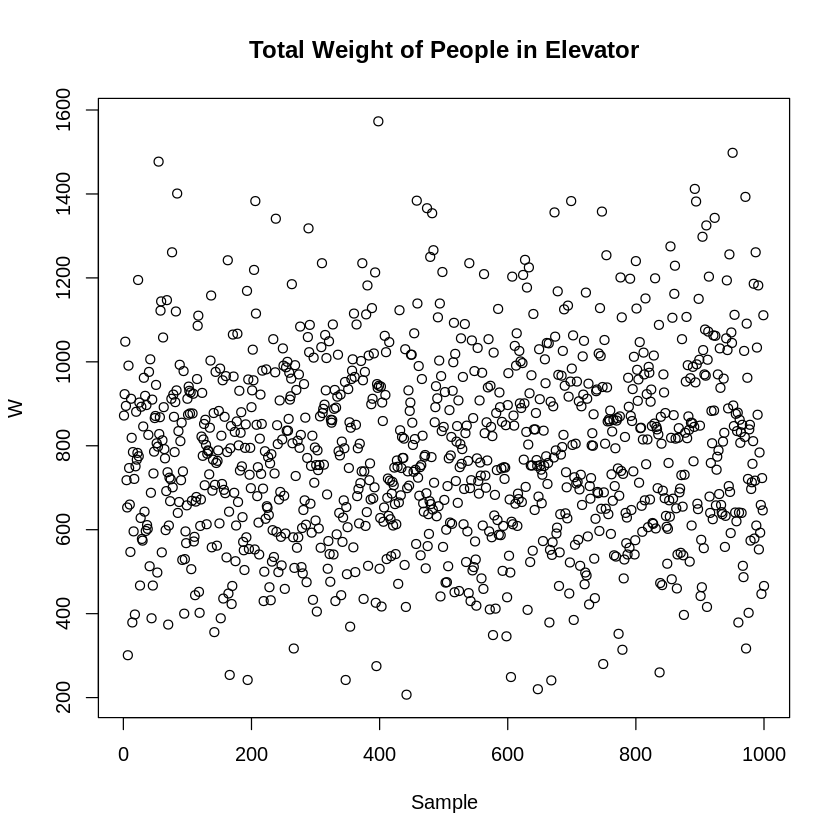

In [6]:
plot(total_weights, main="Total Weight of People in Elevator",
   xlab="Sample", ylab="W")

<div dir='rtl'>
همانطور که در ابتدا اشاره شد شما قصد دارید با ارائه‌ی تحلیل‌های آماری به مدیر امیرانه کمک کنید تا پیش‌بینی کنند که در 80 درصد مواقع آسانسور باید حداکثر چه وزنی را  حمل نماید. 
مطابق ارائه‌های درس می‌توانیم از تابع توزیع تجمعی برای حل مسئله فوق استفاده نماییم:

\begin{equation}
	\begin{aligned}
			&F_W(w) = pr\{ W<w\}\\
			&\to F_W(w_{ideal}) = 0.8 \to w_{ideal} = F_W^{-1}(0.8)
 	\end{aligned}
\end{equation}

همانطور که ملاحظه می‌گردد 
$w_{ideal}$
همان وزن مورد نظر است
که می‌توان بر اساس تابع توزیع تجمعی آنرا محاسبه کرد.

در این بخش قصد داریم با استفاده از توابع آماده در 
$R$
تابع توزیع تجمعی داده‌های حاصل شده از شبیه سازی را بدست آورده و سپس تحلیل‌های مورد نظر را انجام دهیم.
</div>

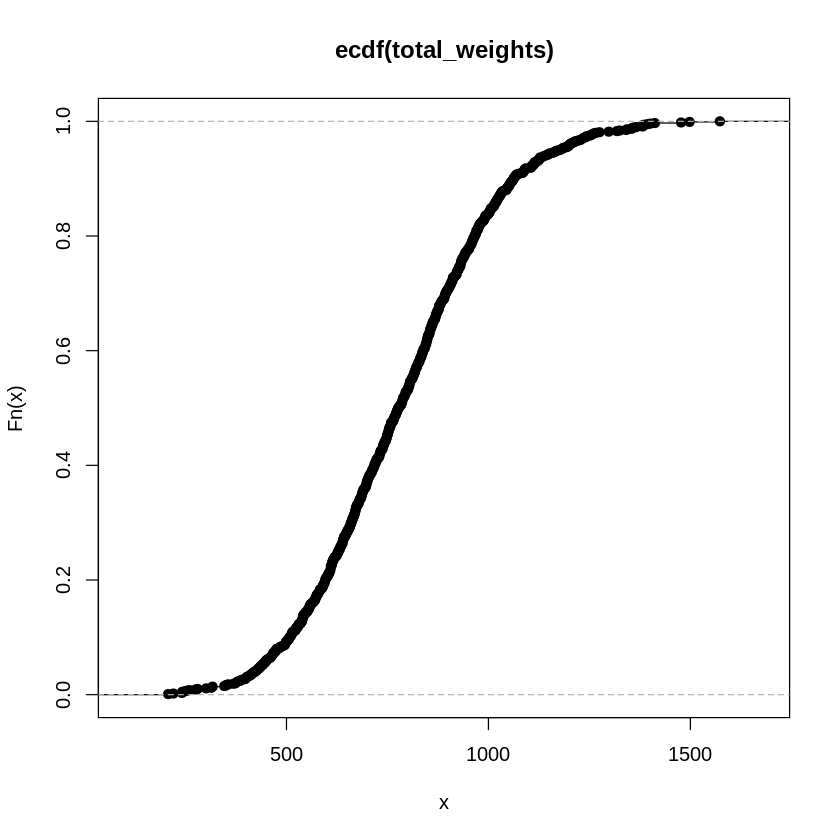

In [7]:
#ecdf plots the cumulative  distribution function diagram based on a given dataset

# Use "ecdf" to plot the CDF of the W.                        #

dataa <- ecdf(total_weights)
plot(dataa)

<div dir='rtl'>
<b>
حال بر اساس نمودار فوق تعیین کنید که آسانسور در 80 درصد مواقع باید چه وزنی را حمل نماید، سپس بر اساس آن به مدیر امیرانه گزارش‌های مرتبط را اعلام نمایید.</b>
</div>

<div dir='rtl'>
بر اساس نمودار کشیده شده، میتوانیم ببینیم که در 80 درصد مواقع، اسانسور حداکثر 
در حدود 960 کیلوگرم وزن را باید تحمل کند.